In [240]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
df = pd.read_csv('./loan.csv')
df.shape

C:\Users\rajesh.r41\AppData\Local\Temp\ipykernel_16916\3872795333.py:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./loan.csv')


(39717, 111)

In [242]:
for column in df.columns:
    if df[column].isnull().sum()>=int((df.shape[0]*0.4)):
        df.drop(columns=column,axis=1,inplace=True)
    elif df[column].dtype in ['int64','float64']:
        if ((df[column]==0).sum())==int(df.shape[0]):
            df.drop(columns=column,axis=1,inplace=True)
colValuse = df.isnull().sum().sort_values(ascending=False)
colValuse

desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
total_pymnt                       0
revol_bal                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_acc                         0
total_rec_late_fee                0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
open_acc                          0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
pub_rec                     

In [243]:
df.drop(['desc','emp_title'],axis=1,inplace=True)
df.shape

(39717, 50)

In [230]:
for i in colValuse[colValuse>0].index:
    if(i not in ['desc','emp_title']):
        df = df[~(df[i].isnull())]
    

In [231]:
df.shape

(37823, 50)

In [232]:
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_

In [233]:
df['Year']= df['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y').year)

<Axes: xlabel='Year'>

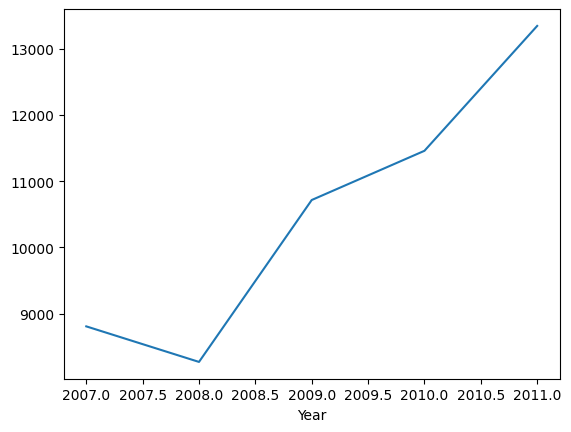

In [238]:
df.groupby('Year')['total_pymnt'].mean().plot.line()

In [246]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [251]:
for i in range(1,4):
    print(i)

1
2
3


In [ ]:
df[column]==0